## Explorating the Tree of Life

<table><tr><td>
<img src="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391" width=200><a href="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391">source</a></td><td><img src="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png" width=300><a href="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png">source</a></td></tr></table>

In this hands-on exercise, you answer the following questions by using pandas data structures and methods to analyze the eukaryote genome data store in the following tab-delimited file. https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv

In [3]:
import pandas as pd
%matplotlib inline

# this input file is tab-delimited instead of comma-delimited
tsvFile = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# Load the csv file into a dataframe
euk = pd.read_csv(tsvFile, sep="\t")
euk

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676000,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924000,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200,37660,2010,Chromosome
...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,-,-,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155,298,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,-,-,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,-,-,2018,Chromosome


## Q1. How many Mammals have at least 20,000 genes? What are their scientific names?
*Note:*
- *Mammals are under Class*
- *Scientific names are under Species*


In [38]:
euk['Number of genes'] = pd.to_numeric(euk["Number of genes"],  errors='coerce')
mammals_with_20k_genes = euk[(euk['Number of genes'] >= 20000) & (euk['Class'] == 'Mammals')]
print("Number of Mammals with at least 20,000 genes: ", mammals_with_20k_genes.shape[0], "\n")
print("Their scientific names:")
mammals_with_20k_genes.Species.to_list()

Number of Mammals with at least 20,000 genes:  134 

Their scientific names:


['Homo sapiens',
 'Mus musculus',
 'Rattus norvegicus',
 'Felis catus',
 'Bos taurus',
 'Ovis aries',
 'Canis lupus',
 'Sus scrofa',
 'Ornithorhynchus anatinus',
 'Equus caballus',
 'Pan troglodytes',
 'Macaca mulatta',
 'Monodelphis domestica',
 'Loxodonta africana',
 'Sorex araneus',
 'Erinaceus europaeus',
 'Cavia porcellus',
 'Echinops telfairi',
 'Dasypus novemcinctus',
 'Oryctolagus cuniculus',
 'Pongo abelii',
 'Canis lupus',
 'Papio anubis',
 'Callithrix jacchus',
 'Otolemur garnettii',
 'Ictidomys tridecemlineatus',
 'Nomascus leucogenys',
 'Myotis lucifugus',
 'Pteropus vampyrus',
 'Tursiops truncatus',
 'Microcebus murinus',
 'Dipodomys ordii',
 'Macaca fascicularis',
 'Ochotona princeps',
 'Bubalus bubalis',
 'Galeopterus variegatus',
 'Vicugna pacos',
 'Gorilla gorilla',
 'Ailuropoda melanoleuca',
 'Cricetulus griseus',
 'Sarcophilus harrisii',
 'Mustela putorius',
 'Bos indicus',
 'Odocoileus virginianus',
 'Saimiri boliviensis',
 'Heterocephalus glaber',
 'Equus asinus',

### Q2. Animals are a part of Kingdom. How many records are there for each Class of Animals?

In [39]:
animals = euk[euk.Kingdom == 'Animals']
animals.Class.value_counts()

,count
Class,
Mammals,658
Insects,602
Fishes,282
Other Animals,210
Birds,172
Roundworms,162
Flatworms,47
Reptiles,41
Amphibians,7


### Q3. Animals are a part of Kingdom. How many unique Species are there for each Class of Animals?

In [40]:
for c in animals.Class.unique():
  print (c, animals[animals.Class == c].Species.nunique())

Roundworms 111
Insects 360
Fishes 217
Other Animals 169
Mammals 296
Amphibians 6
Birds 140
Flatworms 34
Reptiles 38


### Q4. What are the unique scientific names of Mammals with the genus name Macaca?
*Recall: the scientific name starts with genus followed by a space and then the species name. Example: Homo sapiens, where Homo is the genus name and sapiens is the species name.*

In [41]:
euk['Genus'] = euk.Species.str.split(" ").str[0]
euk[euk['Genus'] == 'Macaca'].Species

,Species
119,Macaca mulatta
306,Macaca fascicularis
1116,Macaca nemestrina
1845,Macaca fuscata
4856,Macaca fascicularis
4948,Macaca mulatta
5087,Macaca mulatta
5152,Macaca fascicularis
5646,Macaca mulatta
5740,Macaca mulatta


### Q5. Modify the Species names to only contain the scientific names  and create a new dataframe.

Some of the names in the Species column have more than two parts, such as `Emiliania huxleyi CCMP1516`. Create a new column `Species` that contains only the first two parts of name, such as `Emiliania huxleyi`. Combine this new Species column with `Kingdom`, `Class`, `Size (Mb)`, `Number of genes`, and `Number of proteins` and store this new dataframe as `df_species`.

Hint: Follow Q3 in Lecture 4 with a little twist. Instead of just getting the first element from the split results, you will get the first two elements using `.str[0:2]` which will give you a list. You can then use `.str.join(" ")` to change it back to a string.

In [42]:
df_species = euk
df_species.Species = df_species.Species.str.split(" ").str[0:2].str.join(" ")
df_species

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status,Genus
0,Emiliania huxleyi,Protists,Other Protists,167.676000,64.5,38549.0,38554,2013,Scaffold,Emiliania
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311.0,48265,2001,Chromosome,Arabidopsis
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847.0,71219,2010,Chromosome,Glycine
3,Medicago truncatula,Plants,Land Plants,412.924000,34.047,37603.0,41939,2011,Chromosome,Medicago
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200.0,37660,2010,Chromosome,Solanum
...,...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,NaN,-,2017,Scaffold,Saccharomyces
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155.0,298,1992,Chromosome,Saccharomyces
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,NaN,-,2018,Chromosome,Saccharomyces
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,NaN,-,2018,Chromosome,Saccharomyces


### Q6. Create a pie plot using pandas to show the number of unique Species in each Class of Animals using the new dataframe you created in Q5
Hint: First, create a new dataframe that contains the number of unique Species and the index is the corresponding Animals Class. Then, use that dataframe to plot the pie plot.
[Check out this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

In [43]:
# Create a new dataframe that contains the number of unique Species and
# the index is the corresponding Animals Class.

df_animals = df_species[df_species['Kingdom'] == 'Animals']
df_uspecies = df_animals.groupby('Class')['Species'].nunique()
df_uspecies

,Species
Class,
Amphibians,6
Birds,140
Fishes,217
Flatworms,34
Insects,360
Mammals,296
Other Animals,169
Reptiles,38
Roundworms,111


<Axes: ylabel='Species'>

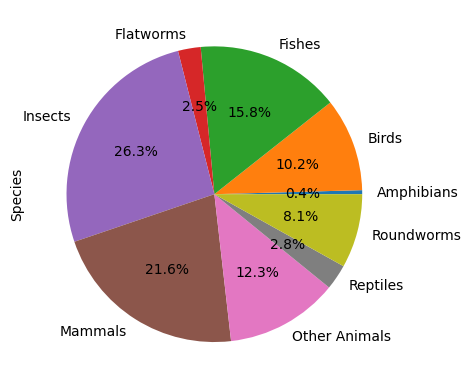

In [44]:
# Create a panda pie plot using the dataframe above
df_uspecies.plot.pie(autopct = "%1.1f%%", y = 'Number of Unique Species')
